In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression #LogisticRegression has regularization method in it

## Look at balance of STAT_CAUSE_DESCR data

In [4]:
# https://www.dataquest.io/blog/python-pandas-databases/ for instructions
# read in the data using SQLite
import sqlite3
conn = sqlite3.connect("/Users/Quicksilver/Desktop/Metis/sea19_ds10/Project03/FPA_FOD_20170508.sqlite")

In [5]:
cursor=conn.cursor()

In [6]:
# look at balance of STAT_CAUSE_DESCR data

In [7]:
query = '''
SELECT STAT_CAUSE_DESCR, COUNT(STAT_CAUSE_DESCR) 
FROM Fires 
GROUP BY STAT_CAUSE_DESCR 
ORDER BY COUNT(STAT_CAUSE_DESCR) DESC;
'''
cursor.execute(query)
causes = cursor.fetchall() # yields list of tuples in "causes" variable

In [8]:
causes, type(causes)

([('Debris Burning', 429028),
  ('Miscellaneous', 323805),
  ('Arson', 281455),
  ('Lightning', 278468),
  ('Missing/Undefined', 166723),
  ('Equipment Use', 147612),
  ('Campfire', 76139),
  ('Children', 61167),
  ('Smoking', 52869),
  ('Railroad', 33455),
  ('Powerline', 14448),
  ('Fireworks', 11500),
  ('Structure', 3796)],
 list)

In [9]:
# make "causes" into a df for plotting purposes
# https://stackoverflow.com/questions/45080698/make-frequency-histogram-from-list-with-tuple-elements
causes_df = pd.DataFrame(causes, columns=['Cause','Frequency'])

In [10]:
causes_df # nice df

,Cause,Frequency
0,Debris Burning,429028
1,Miscellaneous,323805
2,Arson,281455
3,Lightning,278468
4,Missing/Undefined,166723
5,Equipment Use,147612
6,Campfire,76139
7,Children,61167
8,Smoking,52869
9,Railroad,33455


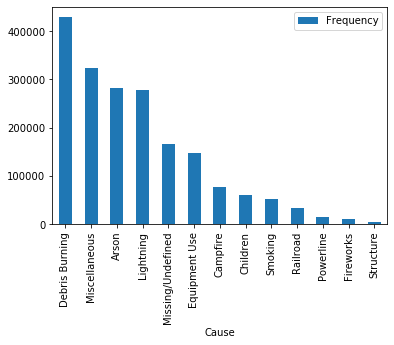

In [11]:
causes_df.plot(kind='bar', x='Cause')

In [ ]:
# data looks unbalanced; most fires are caused by Debris Burning.

# look at balance for STAT_CAUSE_DESCR in WA state.

## Create Predictive Model: Cause vs. State (location)

In [12]:
# query to create X and y dfs
# I don't want to create giant dfs just to split them, so I need to learn how to do train test split with SQL.
# https://stackoverflow.com/questions/34230278/splitting-a-dataset-into-training-and-test-set-in-postgres
# https://www.w3schools.com/sql/sql_case.asp

# train test split through sqlite is too much to spend time on right now, 
# so I'll take a subset of the data so I can use the pandas tools we've learned about so far. 

In [13]:
# use numeric values to get the tools to work.
query = '''
SELECT STAT_CAUSE_CODE, DISCOVERY_DOY 
FROM Fires
WHERE STATE='WA';
'''
cursor.execute(query)
cause_vs_doy_WA = cursor.fetchall()

In [14]:
cause_vs_doy_WA

[(1.0, 170),
 (4.0, 197),
 (6.0, 146),
 (9.0, 215),
 (6.0, 185),
 (1.0, 213),
 (2.0, 161),
 (2.0, 165),
 (8.0, 181),
 (9.0, 185),
 (9.0, 240),
 (6.0, 209),
 (3.0, 218),
 (1.0, 222),
 (1.0, 222),
 (1.0, 222),
 (4.0, 268),
 (4.0, 225),
 (4.0, 212),
 (4.0, 237),
 (4.0, 225),
 (4.0, 213),
 (9.0, 239),
 (4.0, 232),
 (4.0, 240),
 (4.0, 263),
 (9.0, 252),
 (4.0, 212),
 (4.0, 267),
 (4.0, 127),
 (4.0, 128),
 (4.0, 150),
 (4.0, 149),
 (4.0, 155),
 (9.0, 186),
 (4.0, 184),
 (9.0, 217),
 (9.0, 71),
 (4.0, 200),
 (4.0, 195),
 (4.0, 206),
 (4.0, 205),
 (7.0, 218),
 (4.0, 218),
 (4.0, 219),
 (9.0, 226),
 (4.0, 230),
 (4.0, 240),
 (4.0, 225),
 (4.0, 234),
 (4.0, 237),
 (4.0, 244),
 (4.0, 248),
 (2.0, 221),
 (4.0, 227),
 (4.0, 248),
 (4.0, 261),
 (4.0, 268),
 (4.0, 224),
 (4.0, 232),
 (9.0, 100),
 (4.0, 233),
 (4.0, 235),
 (3.0, 234),
 (4.0, 239),
 (3.0, 241),
 (4.0, 247),
 (3.0, 246),
 (3.0, 246),
 (4.0, 212),
 (3.0, 200),
 (4.0, 263),
 (4.0, 264),
 (1.0, 270),
 (1.0, 136),
 (9.0, 161),
 (2.0, 210),


In [15]:
cause_vs_doy_WA_df = pd.DataFrame(cause_vs_doy_WA, columns=['Cause Code','Day of Year'])

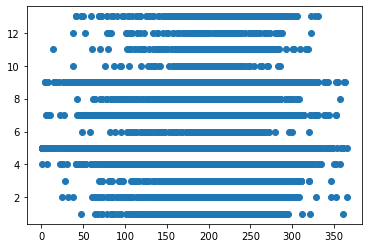

In [16]:
plt.scatter(cause_vs_doy_WA_df['Day of Year'], cause_vs_doy_WA_df['Cause Code'])

### Train Test Split

In [88]:
X = cause_vs_doy_WA_df.loc[:,['Day of Year']]
y = cause_vs_doy_WA_df.loc[:,'Cause Code']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [89]:
X_train.shape, X_test.shape

((26810, 1), (6703, 1))

### Try Logistic Regression

In [90]:
logreg = LogisticRegression(C=100000) 
logreg.fit(X_train,y_train)

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
acc_train = logreg.score(X_train, y_train) # accuracy (score) of train data
print("train_score=%.4f" % (acc_train))

train_score=0.3406


In [95]:
# logreg.predict(X_train)
logreg.predict_proba(X_train)

array([[0.21605698, 0.02173453, 0.00950435, ..., 0.00999376, 0.00412907,
        0.01205657],
       [0.30303138, 0.02616237, 0.0297305 , ..., 0.01276941, 0.00347714,
        0.01793597],
       [0.30468666, 0.02617706, 0.03073859, ..., 0.01280311, 0.00343613,
        0.01807829],
       ...,
       [0.30695192, 0.0261806 , 0.03228985, ..., 0.01284475, 0.00337313,
        0.0182809 ],
       [0.3054707 , 0.02618068, 0.03125045, ..., 0.01281817, 0.00341532,
        0.01814727],
       [0.30622576, 0.02618185, 0.03176754, ..., 0.01283205, 0.00339432,
        0.01821481]])

In [97]:
print("logreg class:",logreg.classes_)
print("logreg intercept for each 'one vs. all':",logreg.intercept_)
print("logreg coefficients:",logreg.coef_)

logreg class: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
logreg intercept for each 'one vs. all': [-1.52870587 -3.84209259 -5.56978473 -3.65561952  0.9227437  -4.54403456
 -2.77499068 -3.79947415 -1.73868356 -2.08259831 -4.68558051 -5.19244106
 -4.63726379]
logreg coefficients: [[ 0.00303507]
 [ 0.00093177]
 [ 0.00938241]
 [ 0.00758253]
 [-0.0131471 ]
 [-0.00138494]
 [-0.00150505]
 [ 0.00186737]
 [ 0.00279704]
 [-0.00748537]
 [ 0.00144463]
 [-0.00220613]
 [ 0.00279273]]


### Try KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("The score for kNN is")
print("{:6.2f}%".format(100*knn.score(X_train, y_train)))
# kNN score is slightly higher than for logreg.

The score for kNN is
 34.16%


In [104]:
acc_train = logreg.score(X_train, y_train) # accuracy (score) of train data
print("The score for Logistic Regression is")
print("%.4f" % (acc_train))

The score for Logistic Regression is
0.3406
